<a href="https://colab.research.google.com/github/Ezzaldin97/pytorch-coding/blob/main/pyTorch_DL_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [35]:
X_np, y_np = datasets.make_regression(n_samples = 500, n_features = 1, random_state = 42, noise = 20)
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape
print(n_samples)

500


In [36]:
class LinearRegressor(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressor, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)
  def forward(self, X):
    return self.lin(X)

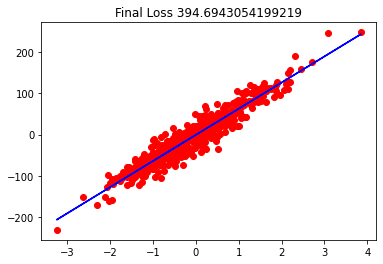

In [38]:
model = LinearRegressor(n_features, 1)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
for _ in range(10000):
  y_hat = model(X)
  l = loss(y_hat, y)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
preds = model(X).detach().numpy()
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, preds, 'b')
plt.title(f"Final Loss {l}")
plt.show()